In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mpl
from datetime import datetime, timedelta
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)
incidents = pd.read_csv('incidents_marchplus.csv')
alerts = pd.read_csv('alerts_marchplus.csv')

In [20]:
# use only hope deopt sev 1 incidents

incidents = incidents.loc[(incidents['incident_priority']=='1 - Critical') & (incidents['incident_acc']=='ACCT0011196')]

#epoch
incidents['u_updated_on'] = pd.to_datetime(incidents['u_updated_on']).dt.tz_convert('UTC')
incidents['epoch'] = (incidents['u_updated_on'] - pd.Timestamp("1970-01-01", tz='UTC')) // pd.Timedelta('1s')


In [21]:
alerts['alert_timestamp'] = pd.to_datetime(alerts['alert_timestamp'], unit='ns')

# convert datetime objects to epoch in seconds
alerts['epoch'] = alerts['alert_timestamp'].astype(int) // 10**9

In [22]:
inc_subsites = incidents.groupby('incident_sub_site').count().sort_values(by='incident_id')
inc_subsites = inc_subsites.reset_index()
inc_subsites = inc_subsites.loc[inc_subsites['incident_id'] > 50]
inc_subsites

,incident_sub_site,incident_id,incident_acc,incident_sub_acc,incident_site,incident_state,hold_reason,incident_desc,device_id,incident_mapped_alert_id,incident_category,incident_sub_category,incident_priority,incidient_opening,u_updated_on,incident_y,incident_m,incident_d,epoch
475,ACCT0012931,51,51,51,51,51,0,51,51,51,51,51,51,51,51,51,51,51,51
476,ACCT0012089,52,52,52,52,52,2,52,52,52,52,52,52,52,52,52,52,52,52
477,ACCT0013077,53,53,53,53,53,15,53,53,53,53,53,53,53,53,53,53,53,53
478,ACCT0011575,54,54,54,54,54,2,54,54,54,54,54,54,54,54,54,54,54,54
479,ACCT0011240,56,56,56,56,56,0,56,56,56,56,56,56,56,56,56,56,56,56
480,ACCT0011684,56,56,56,56,56,19,56,56,56,56,56,56,56,56,56,56,56,56
481,ACCT0012546,58,58,58,58,58,13,58,58,58,58,58,58,58,58,58,58,58,58
482,ACCT0013155,60,60,60,60,60,35,60,60,60,60,60,60,60,60,60,60,60,60
483,ACCT0011408,62,62,62,62,62,3,62,62,62,62,62,62,62,62,62,62,62,62
484,ACCT0015698,64,64,64,64,64,0,64,64,64,64,64,64,64,64,64,64,64,64


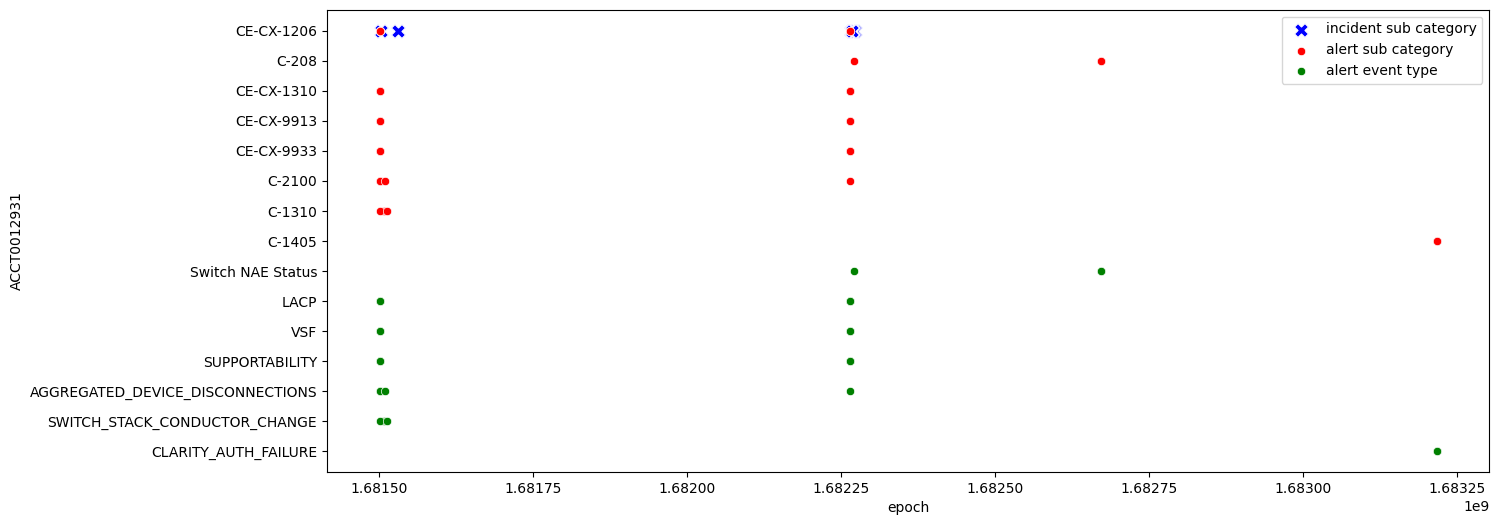

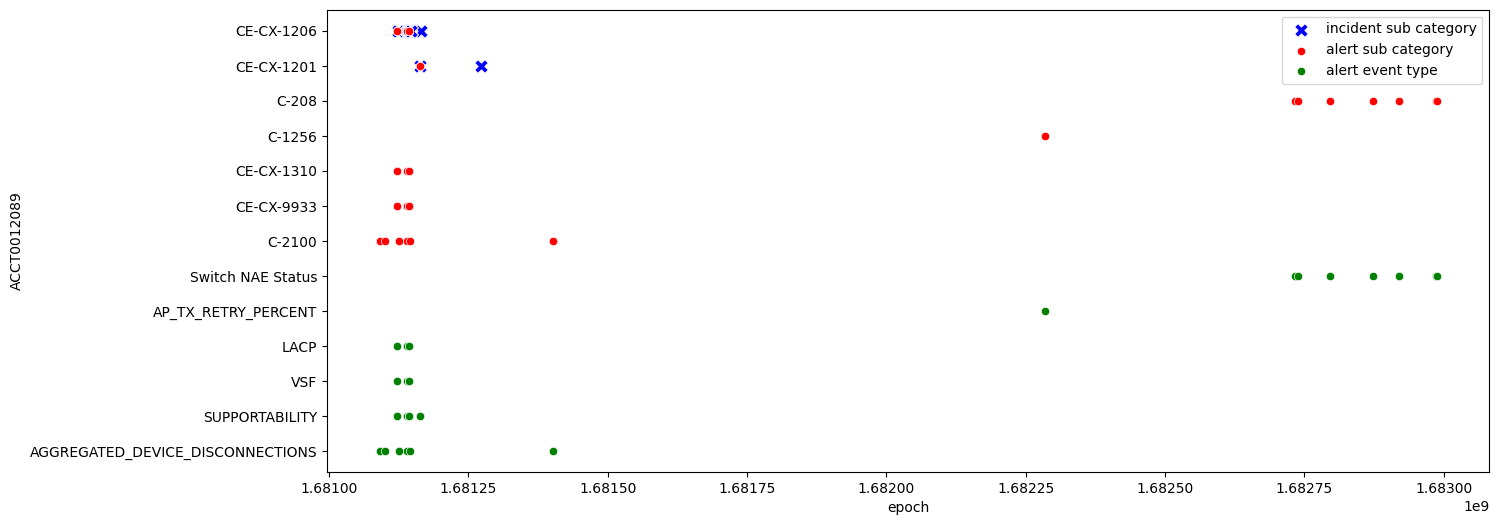

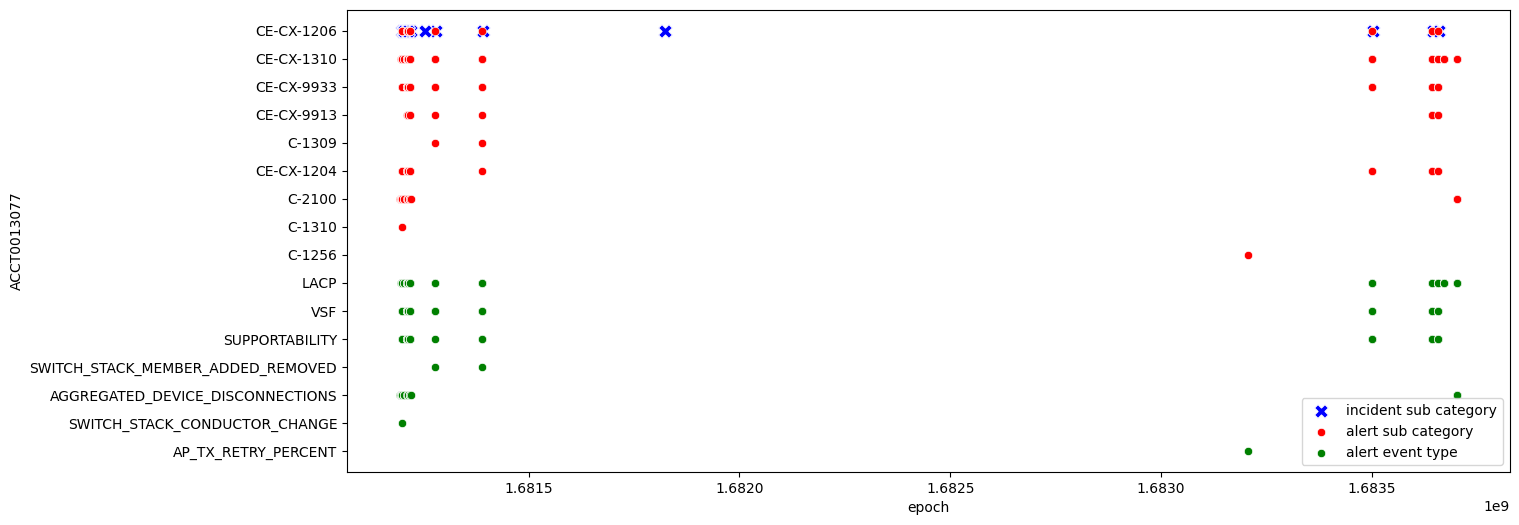

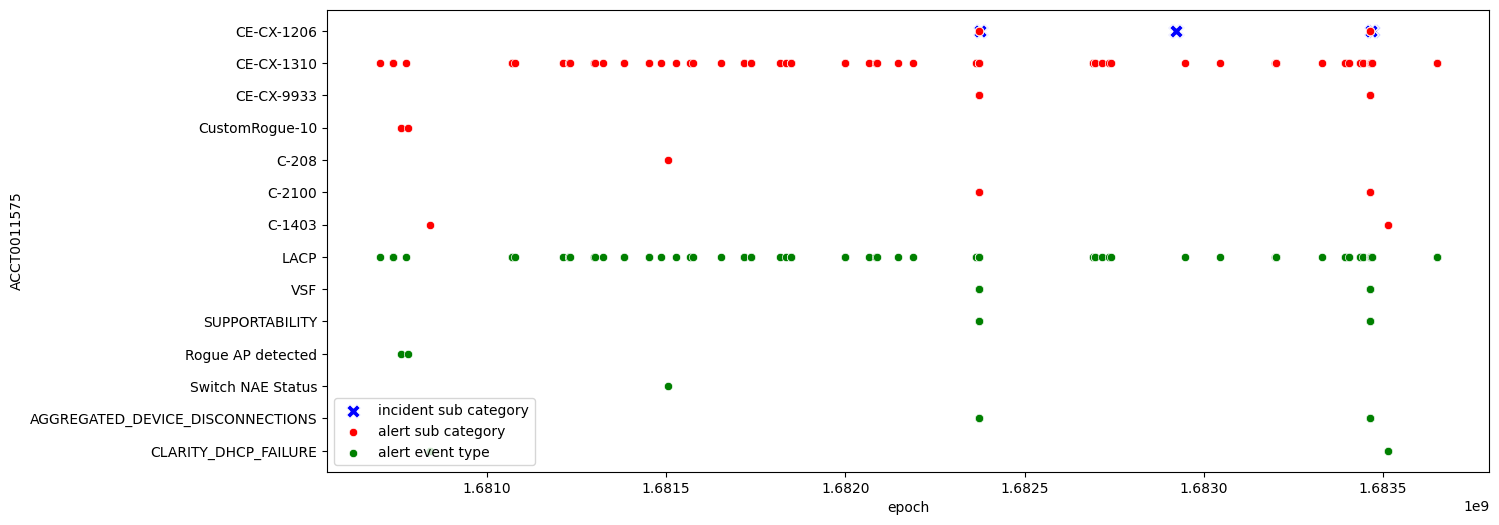

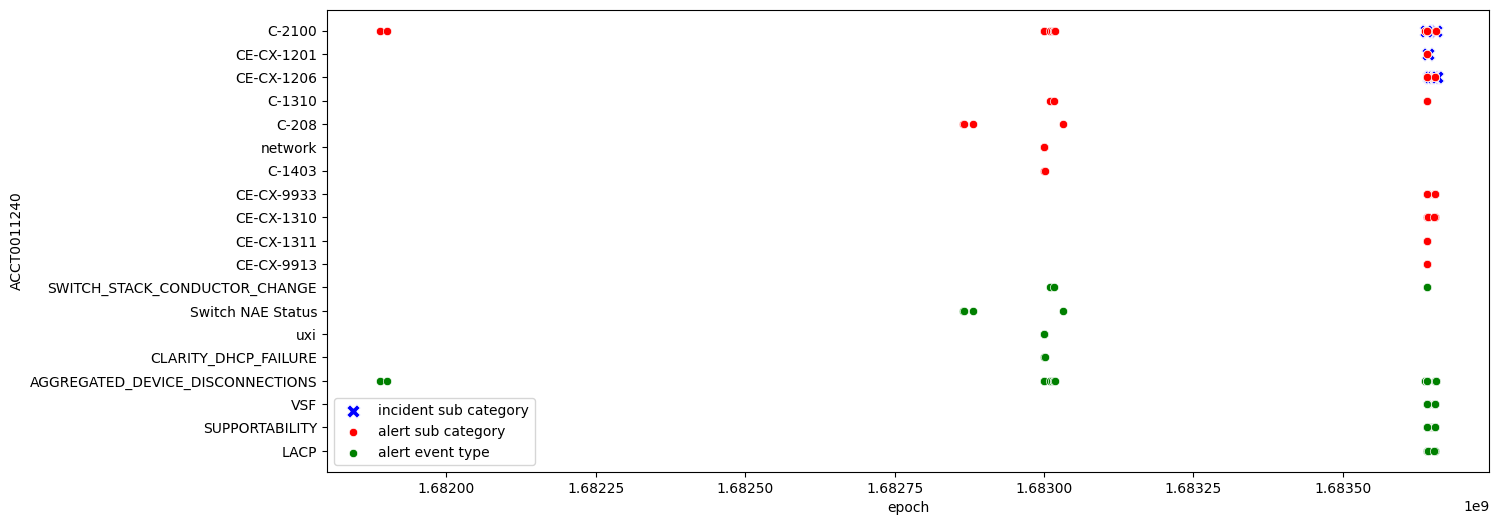

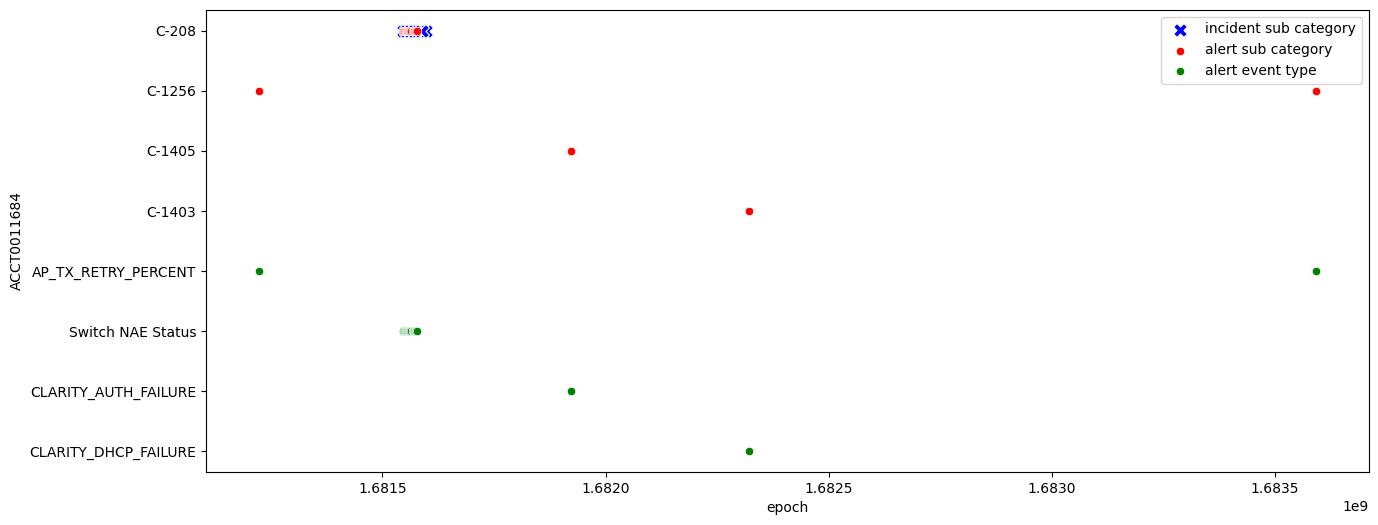

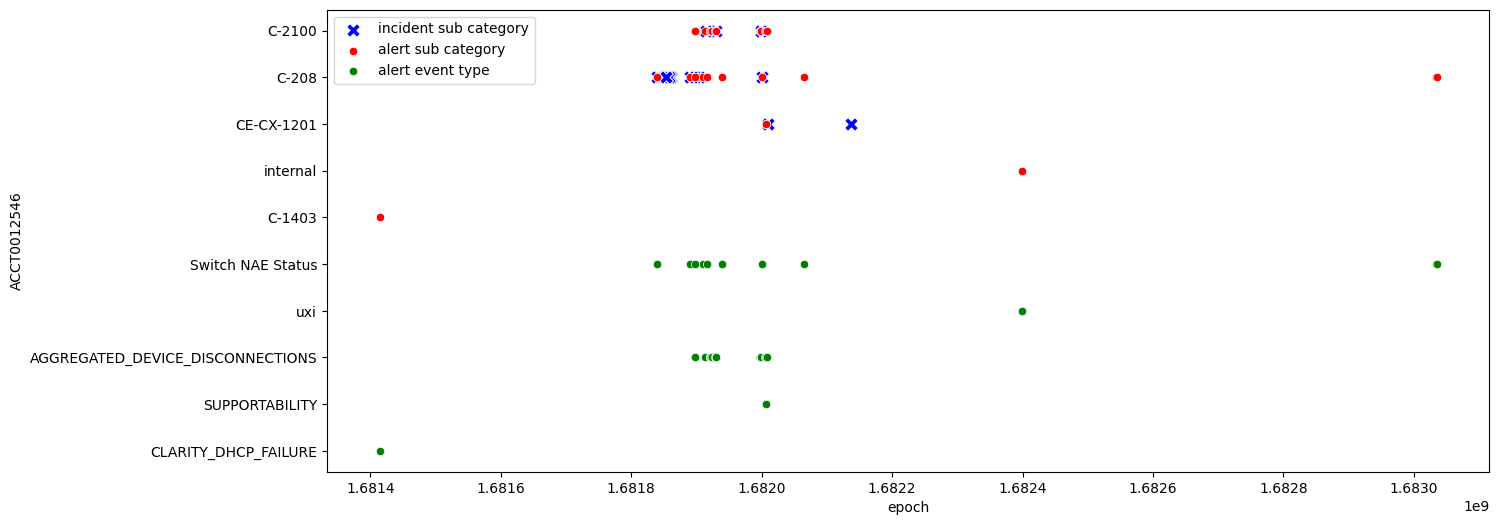

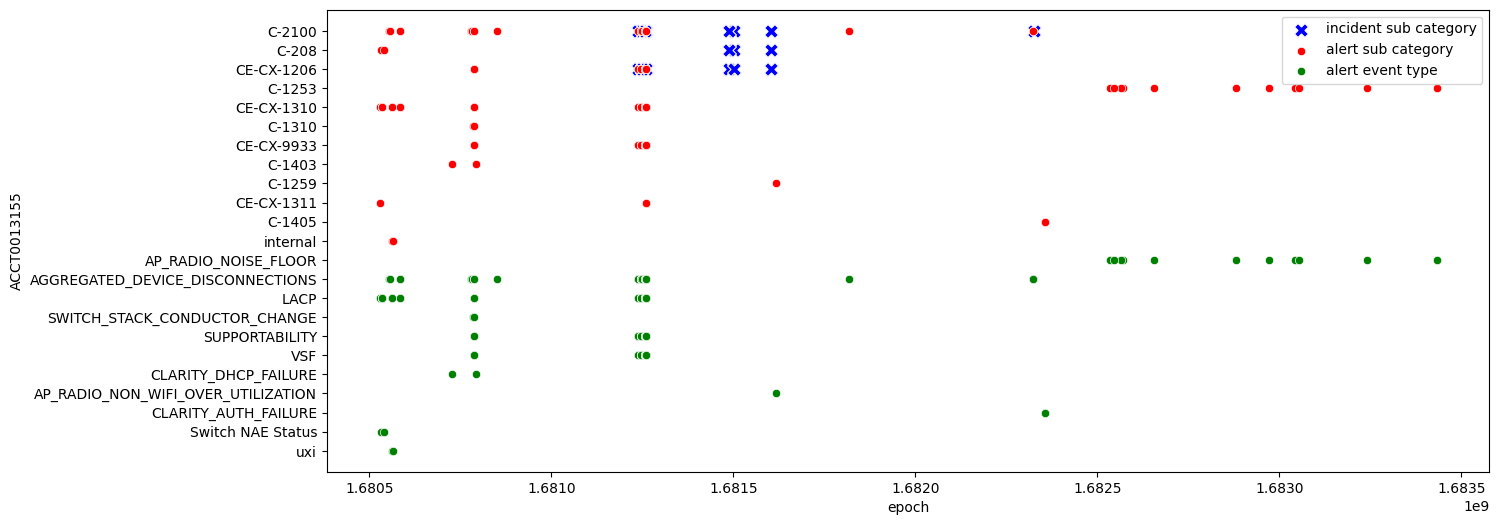

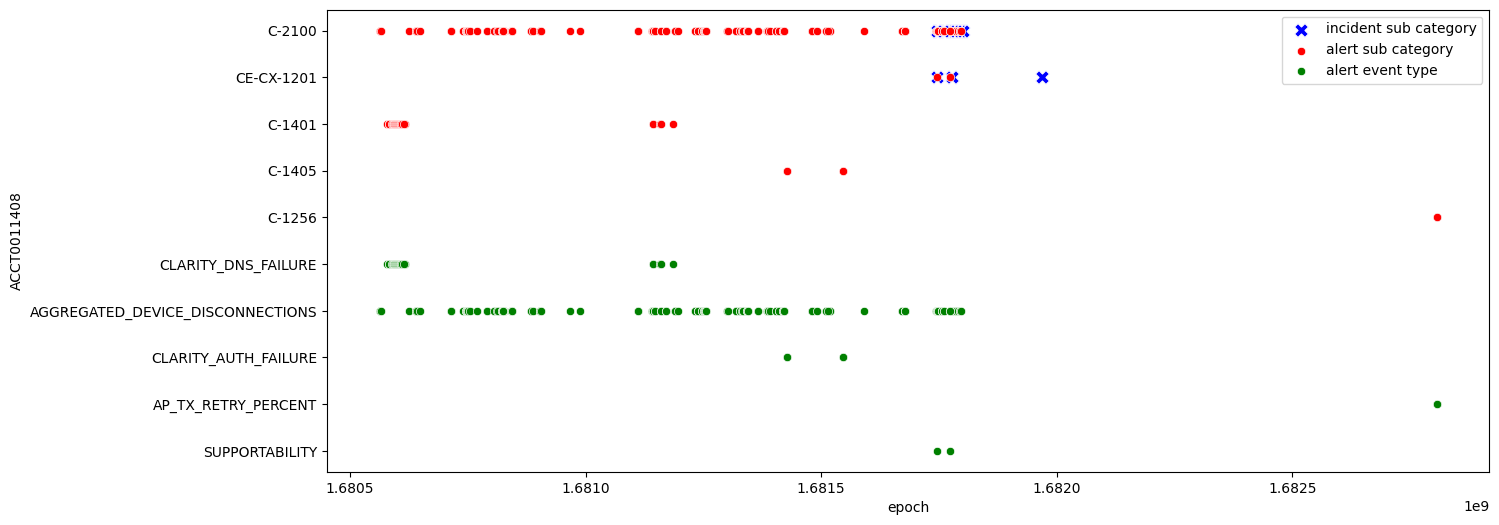

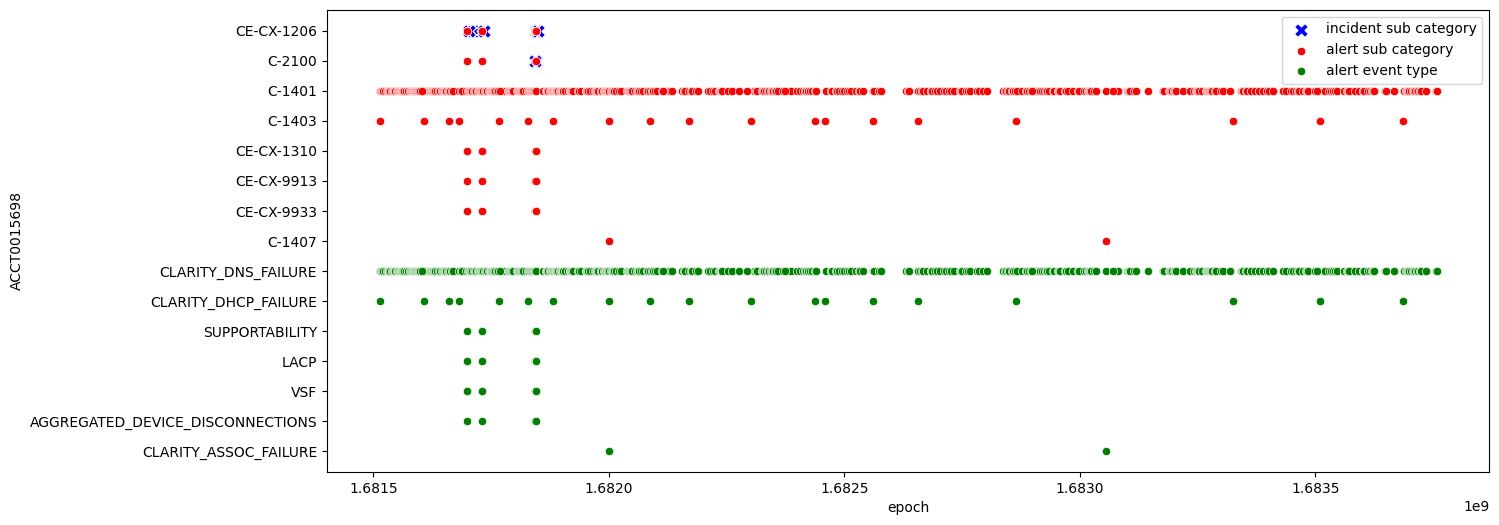

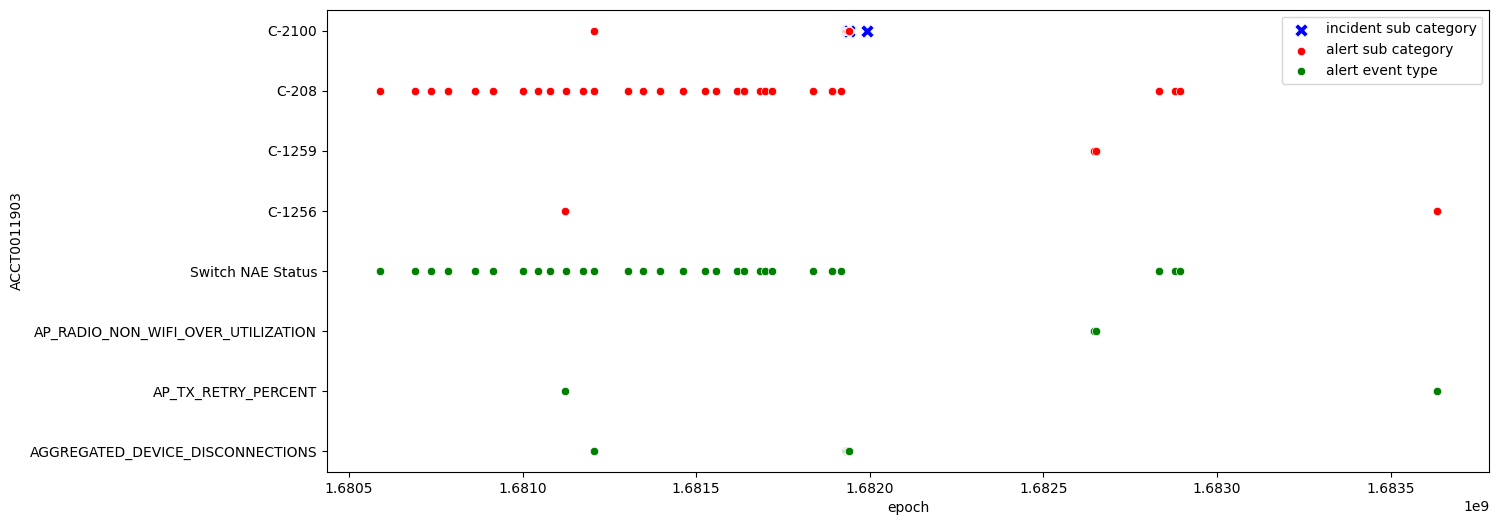

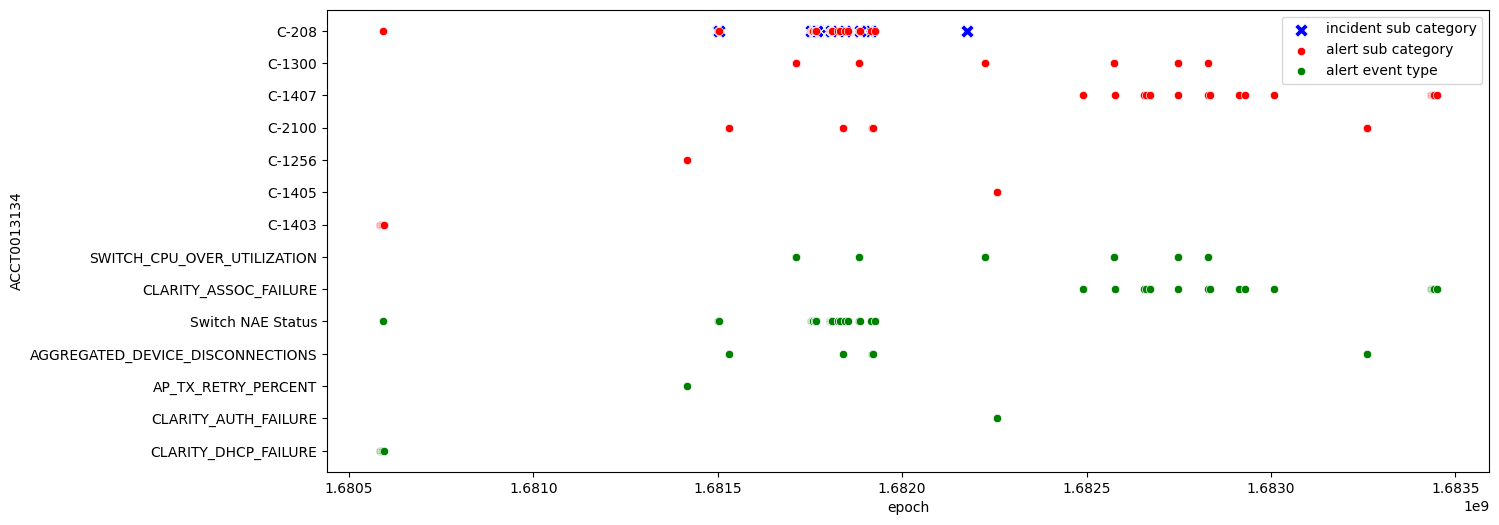

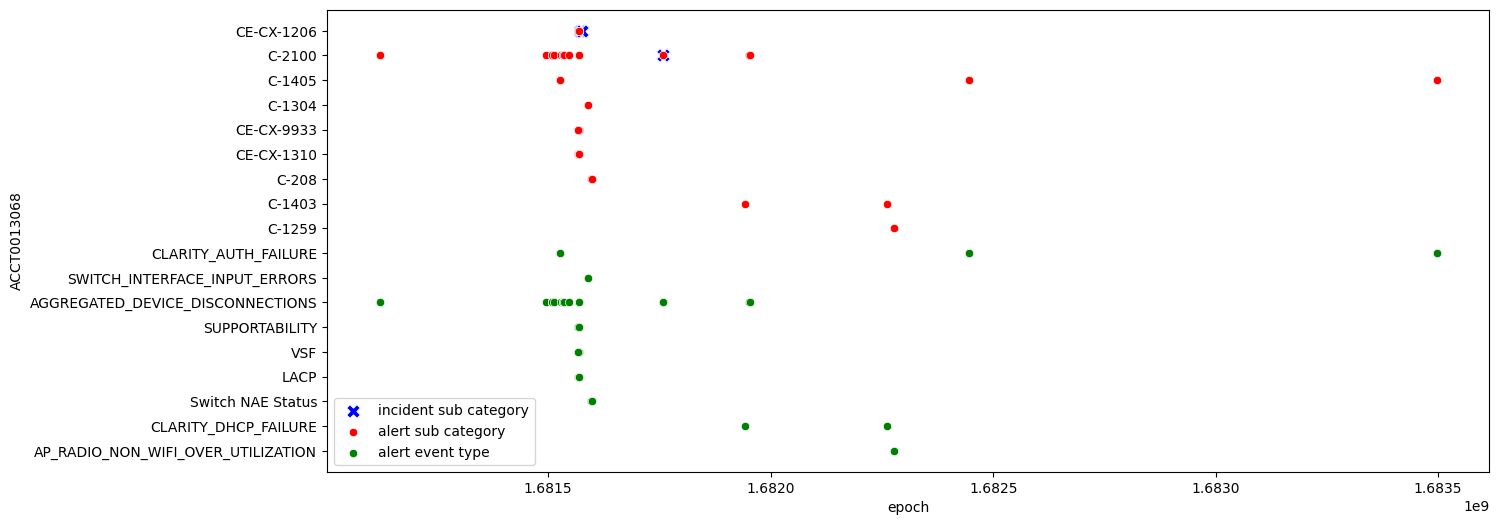

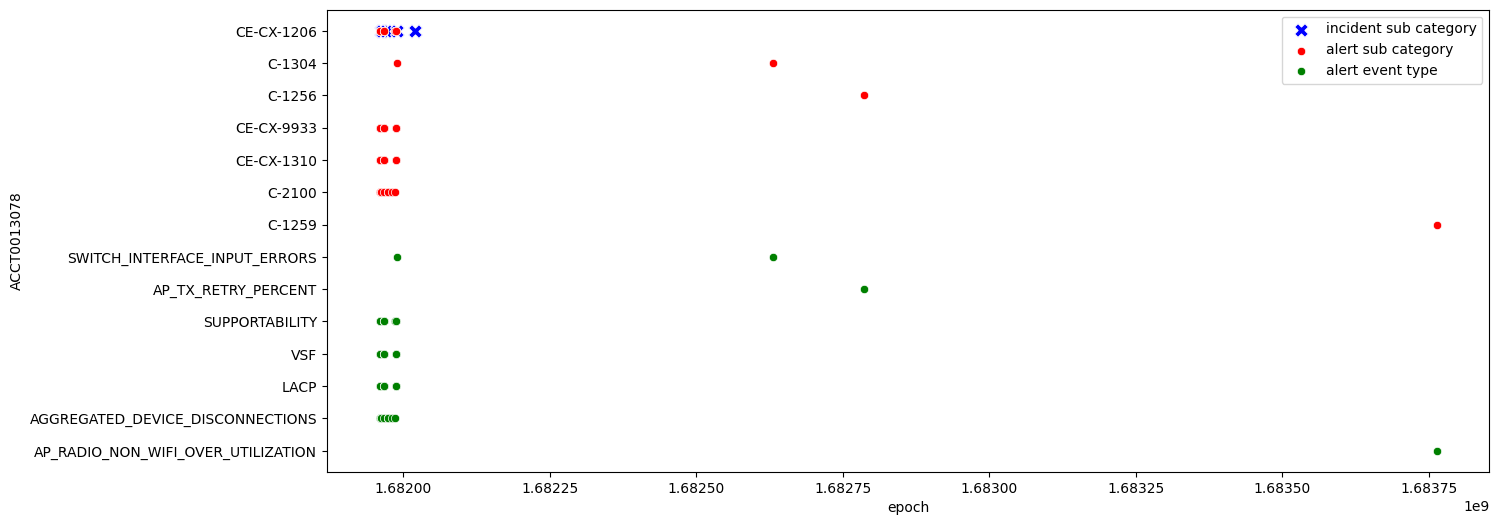

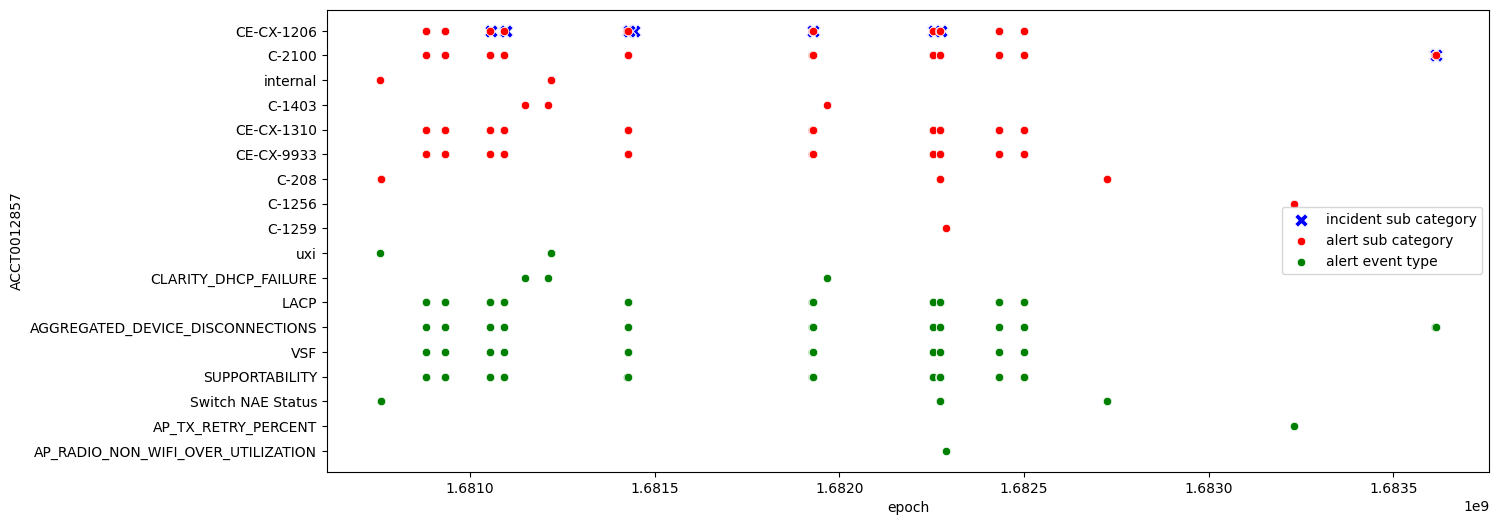

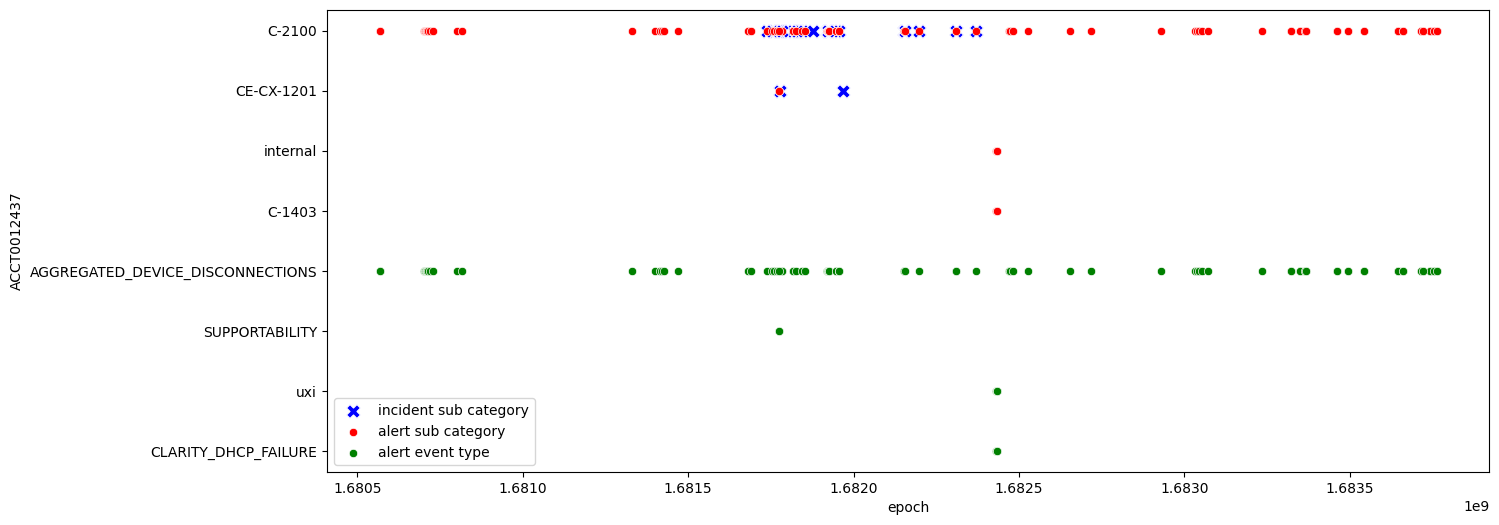

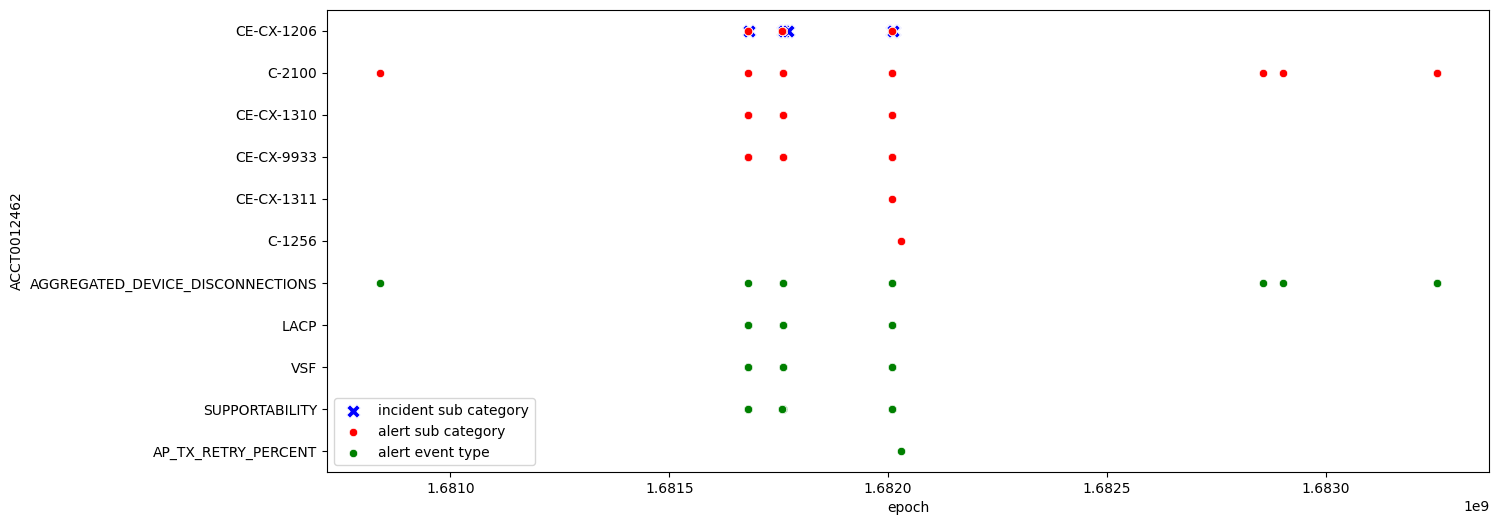

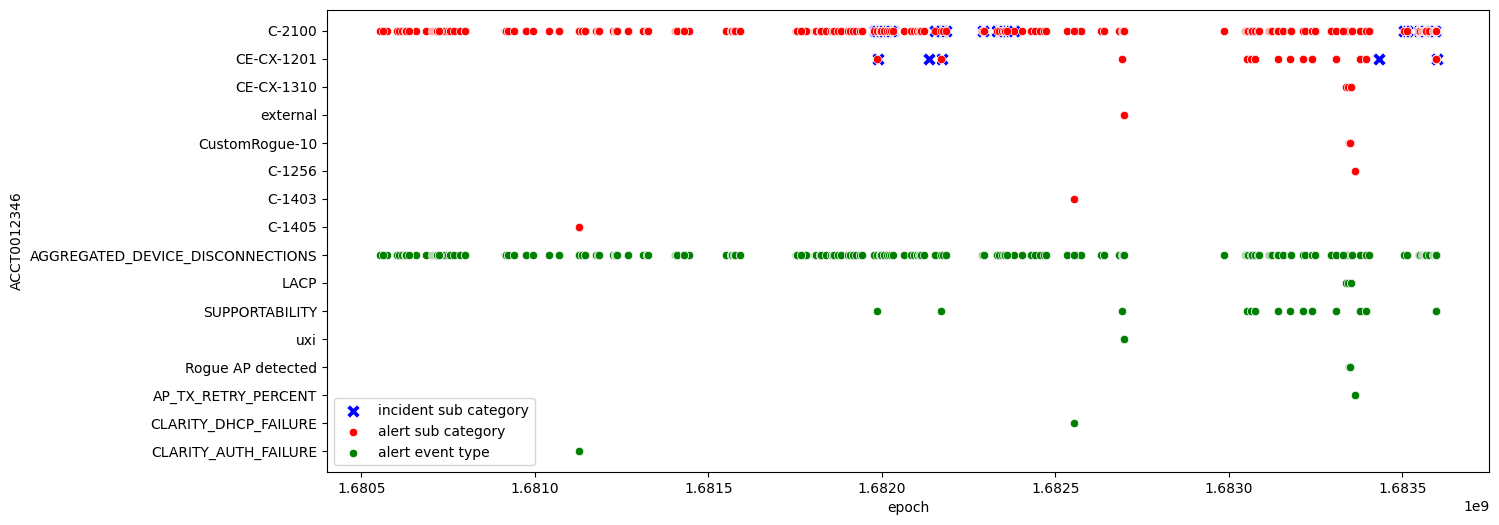

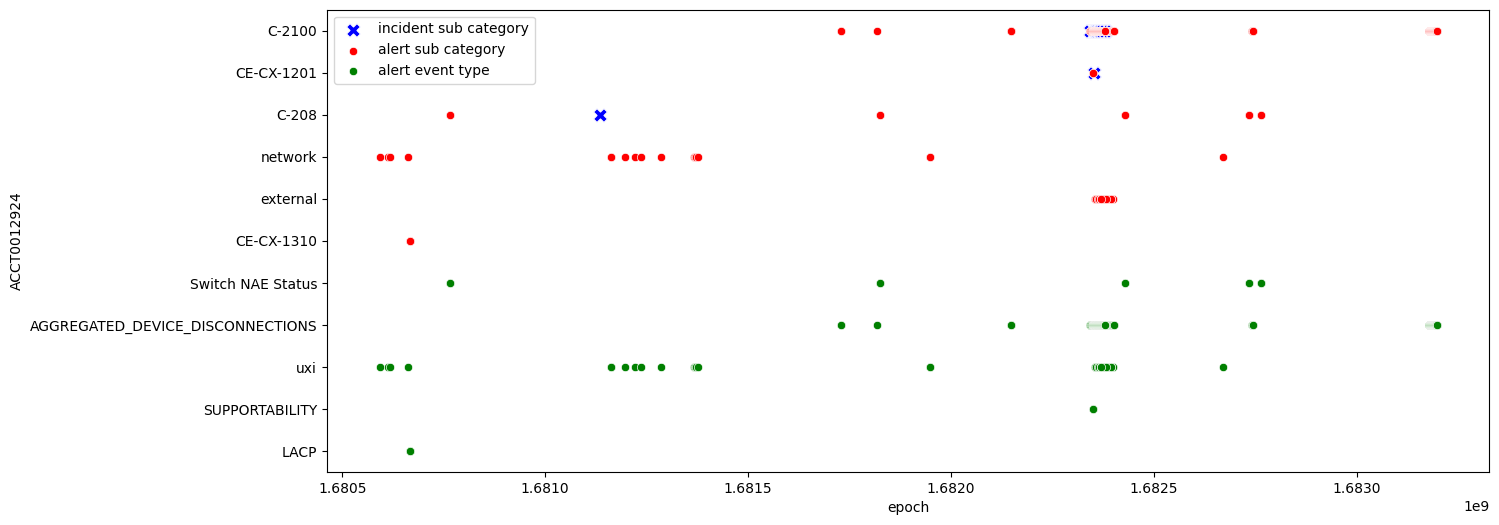

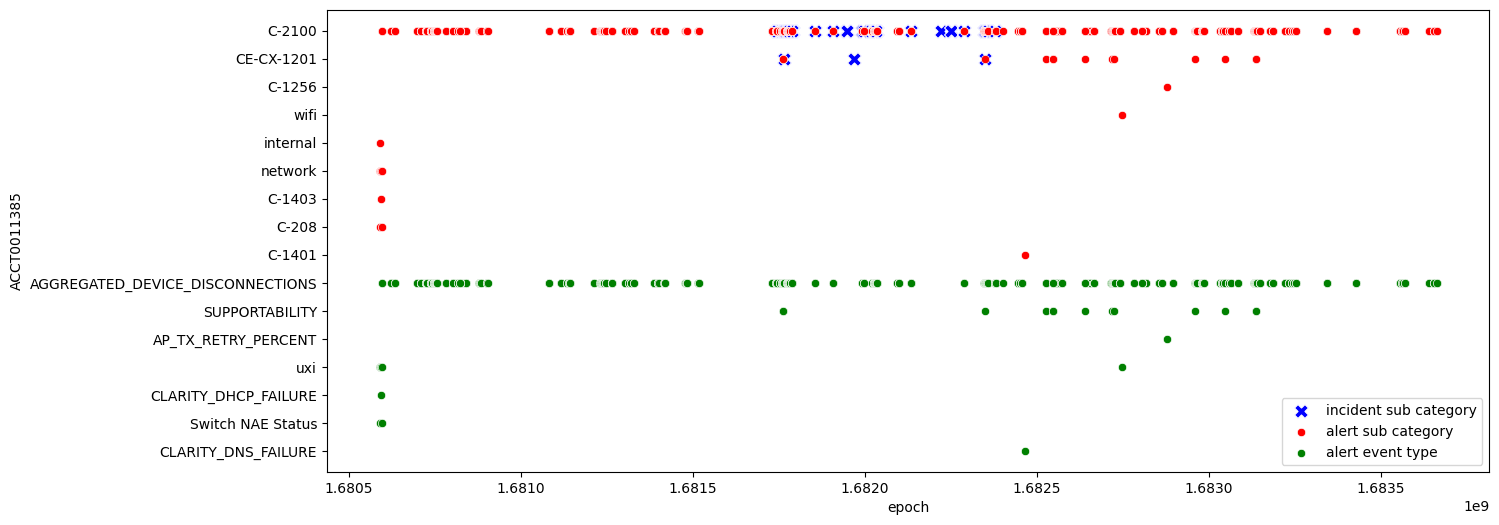

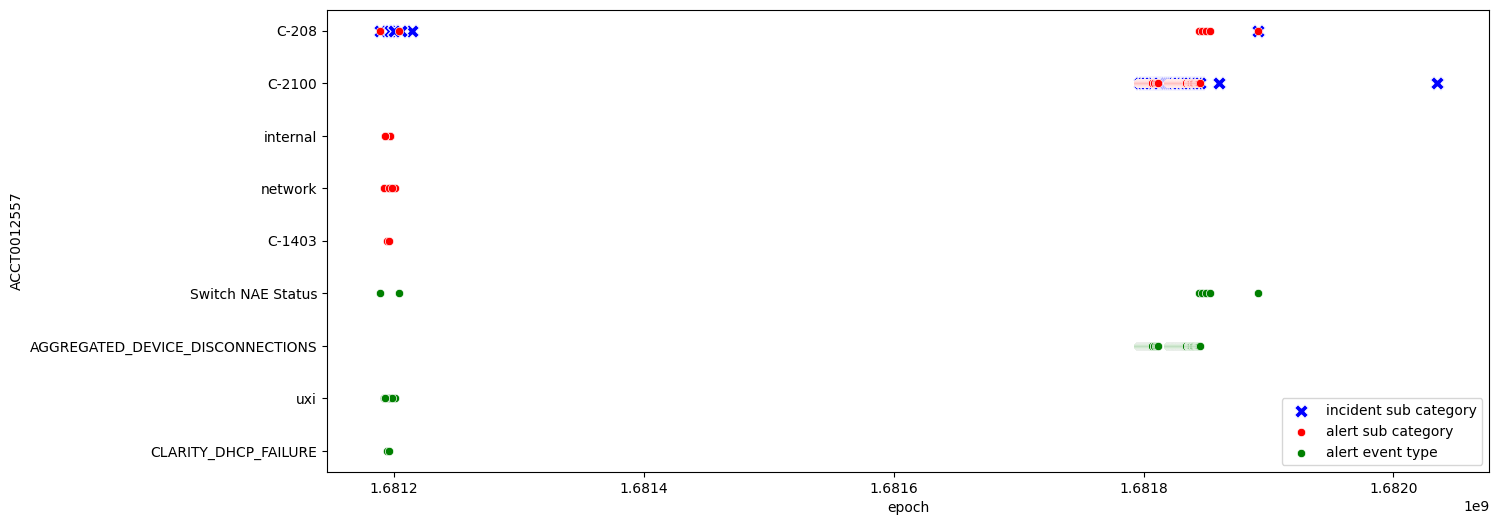

In [24]:
for i in range(len(inc_subsites)):
    x = inc_subsites.iloc[i, 0]
    inc_sub = incidents.loc[incidents['incident_sub_site']==x]
    alert_sub = alerts.loc[alerts['alert_sub_site_id']==x]
    mpl.figure(figsize=(15, 6))


    sns.scatterplot(data = inc_sub, x = 'epoch', y = 'incident_sub_category', color='blue', label = 'incident sub category', marker = "X", s = 100)
    #sns.scatterplot(data = inc_sub, x = 'epoch', y = 'incident_id', color='orange', label = 'incident sub category', marker = "X", s = 200)

    sns.scatterplot(data = alert_sub, x = 'epoch', y = 'sub_category', color='red', label = 'alert sub category')

    sns.scatterplot(data = alert_sub, x = 'epoch', y = 'alert_event_type', color = 'green', label = 'alert event type')
    mpl.ylabel(x)
    mpl.show()

In [17]:
incidents.groupby("incident_priority").count()

,incident_id,incident_acc,incident_sub_acc,incident_site,incident_sub_site,incident_state,hold_reason,incident_desc,device_id,incident_mapped_alert_id,incident_category,incident_sub_category,incidient_opening,u_updated_on,incident_y,incident_m,incident_d,epoch
incident_priority,,,,,,,,,,,,,,,,,,
1 - Critical,12112,12112,12112,12112,6652,12112,3573,12112,6652,12103,6625,6625,12112,12112,12112,12112,12112,12112


In [18]:
incidents.loc[incidents['incident_id'] == 'INC0510702']

,incident_id,incident_acc,incident_sub_acc,incident_site,incident_sub_site,incident_state,hold_reason,incident_desc,device_id,incident_mapped_alert_id,incident_category,incident_sub_category,incident_priority,incidient_opening,u_updated_on,incident_y,incident_m,incident_d,epoch
17486,INC0510702,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0011408,New,NaN,Multiple switch devices were disconnected at s...,SG25KMY4X9,CentralSite-C-2100-AGG-SWITCH-ACCT0011408,Central,C-2100,1 - Critical,2023-04-17T16:07:42.000Z,2023-04-17 16:19:39+00:00,2023,4,17,1681748379
17491,INC0510702,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0011408,New,NaN,Multiple switch devices were disconnected at s...,SG25KMY4X9,CentralSite-C-2100-AGG-SWITCH-ACCT0011408,Central,C-2100,1 - Critical,2023-04-17T16:07:42.000Z,2023-04-17 16:28:01+00:00,2023,4,17,1681748881
53437,INC0510702,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0011408,In Progress,NaN,Multiple switch devices were disconnected at s...,SG25KMY4X9,CentralSite-C-2100-AGG-SWITCH-ACCT0011408,Central,C-2100,1 - Critical,2023-04-17T16:07:42.000Z,2023-04-17 16:59:10+00:00,2023,4,17,1681750750
56637,INC0510702,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0011408,New,NaN,Multiple switch devices were disconnected at s...,SG25KMY4X9,CentralSite-C-2100-AGG-SWITCH-ACCT0011408,Central,C-2100,1 - Critical,2023-04-17T16:07:42.000Z,2023-04-17 16:28:01+00:00,2023,4,17,1681748881
97035,INC0510702,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0011408,New,NaN,Multiple switch devices were disconnected at s...,SG25KMY4X9,CentralSite-C-2100-AGG-SWITCH-ACCT0011408,Central,C-2100,1 - Critical,2023-04-17T16:07:42.000Z,2023-04-17 16:19:39+00:00,2023,4,17,1681748379
120664,INC0510702,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0011408,New,NaN,Multiple switch devices were disconnected at s...,SG25KMY4X9,CentralSite-C-2100-AGG-SWITCH-ACCT0011408,Central,C-2100,1 - Critical,2023-04-17T16:07:42.000Z,2023-04-17 16:19:40+00:00,2023,4,17,1681748380
120665,INC0510702,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0011408,New,NaN,Multiple switch devices were disconnected at s...,SG25KMY4X9,CentralSite-C-2100-AGG-SWITCH-ACCT0011408,Central,C-2100,1 - Critical,2023-04-17T16:07:42.000Z,2023-04-17 16:19:40+00:00,2023,4,17,1681748380
